In [1]:
! pip3 install featexp
! pip3 install xgboost

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Local imports,
from featexp import *

In [2]:
notebook_path = os.path.abspath("test.ipynb")
data_folder = "/home-credit-default-risk/"
train_data_file = "application_train.csv"
test_data_file = "application_test.csv"
print(os.path.dirname(notebook_path) + data_folder + train_data_file)

c:\git\intelligent-systems-practice\article/home-credit-default-risk/application_train.csv


In [3]:
# Functions for data preprocessing.
def get_nonull_dummy_data(application_train_raw, dummy_drop=["ORGANIZATION_TYPE"]):
    # Idenifying float cols with less nulls and imputing with mean.
    nulls = pd.isnull(application_train_raw).sum()
    less_nulls = nulls[(nulls < 3075) & (nulls != 0)].index
    less_nulls_float = []
    for i in range(len(less_nulls)):
        if application_train_raw[less_nulls[i]].dtype != "O":
            less_nulls_float.append(less_nulls[i])

    application_train_raw[less_nulls_float] = application_train_raw[
                                                less_nulls_float].fillna(application_train_raw[less_nulls_float].mean())

    # Idenifying float cols with high nulls and creating null_flag 
    # column and imputing with min-10.
    more_nulls = nulls[(nulls >= 3075)].index
    more_nulls_float = []
    for i in range(len(more_nulls)):
        if application_train_raw[more_nulls[i]].dtype != "O":
            more_nulls_float.append(more_nulls[i])

    application_train_raw[more_nulls_float] = application_train_raw[
                                                more_nulls_float].fillna(application_train_raw[more_nulls_float].min() - 100)

    # Get dummies. Drop some columns for now.
    try:
        application_train_raw.drop(columns=dummy_drop, axis=1, inplace=True)  # Try using later.
    except Exception:
        pass

    all_cols = application_train_raw.columns
    cat_cols = []
    for col in all_cols:
        if application_train_raw[col].dtype == "O":
            cat_cols.append(col)

    application_train_raw = pd.get_dummies(application_train_raw, columns=cat_cols, dummy_na=True)

    return application_train_raw

In [4]:
def import_and_create_train_test_data(train_data_file, test_size=0.33, random_state=42):
    application_raw = pd.read_csv(train_data_file)
    application = get_nonull_dummy_data(application_raw, dummy_drop=["ORGANIZATION_TYPE"])

    X = application.drop(["TARGET"], axis=1)  # Contains ID.
    y = application["TARGET"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return (X_train, X_test, y_train, y_test)

In [5]:
def import_and_create_TEST_data(test_data_file):
    application_raw = pd.read_csv(test_data_file)
    application = get_nonull_dummy_data(application_raw, dummy_drop=["ORGANIZATION_TYPE"])
    return application

In [9]:
X_train, X_test, y_train, y_test = import_and_create_train_test_data(os.path.dirname(notebook_path) +                                                                                                          data_folder + train_data_file)
X_TEST = import_and_create_TEST_data(os.path.dirname(notebook_path) + data_folder + test_data_file)

try:
    drop=['CODE_GENDER_XNA', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown', 'SK_ID_CURR']
    X_train = X_train.drop(drop, axis=1)
    X_test = X_test.drop(drop, axis=1)
except Exception:
    pass


In [10]:
data_train = X_train.reset_index(drop=True)
data_train['target'] = y_train.reset_index(drop=True)
data_test = X_test.reset_index(drop=True)
data_test['target'] = y_test.reset_index(drop=True)

                                        Plots for CNT_CHILDREN                                        
                                           Train data plots                                           


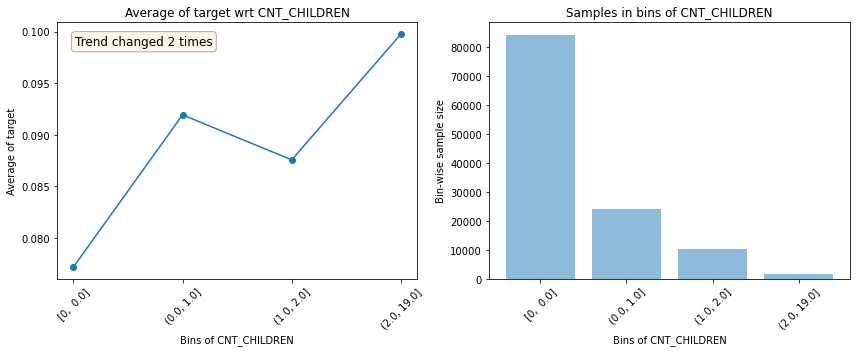

                                           Test data plots                                            


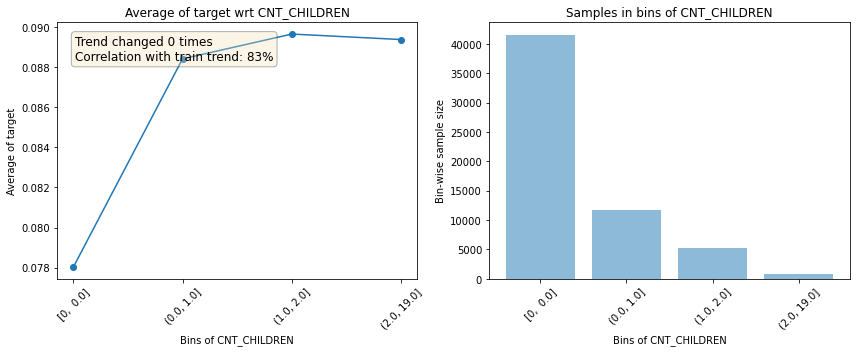

--------------------------------------------------------------------------------------------------------------


                                      Plots for AMT_INCOME_TOTAL                                      
                                           Train data plots                                           


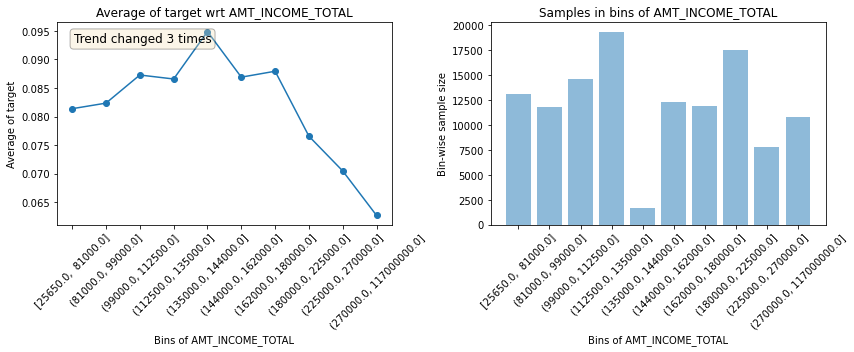

                                           Test data plots                                            


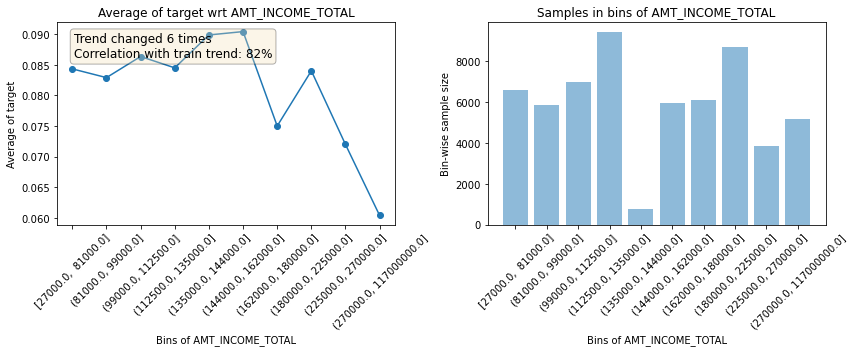

--------------------------------------------------------------------------------------------------------------


                                         Plots for AMT_CREDIT                                         
                                           Train data plots                                           


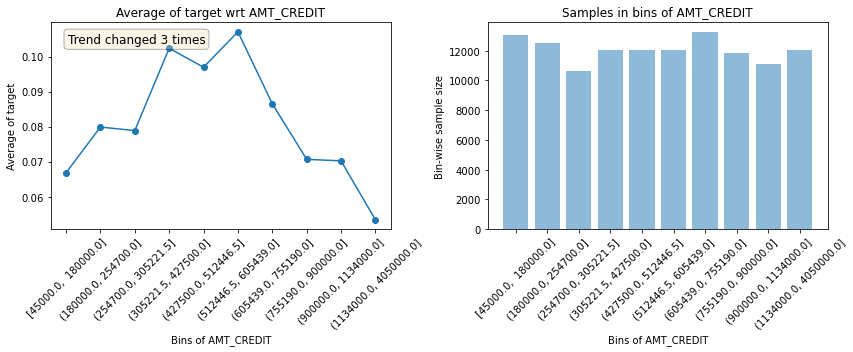

                                           Test data plots                                            


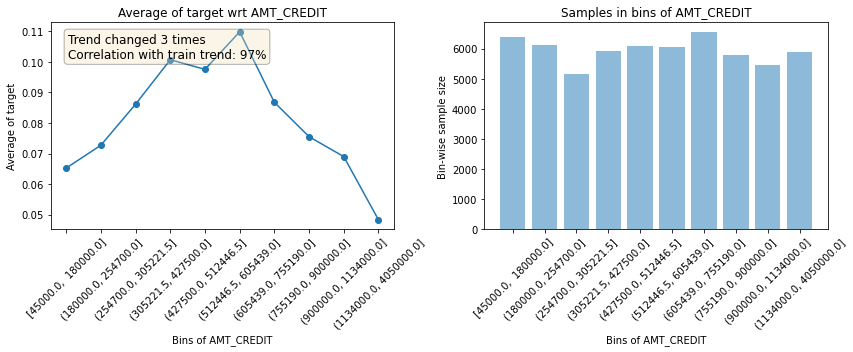

--------------------------------------------------------------------------------------------------------------


                                        Plots for AMT_ANNUITY                                         
                                           Train data plots                                           


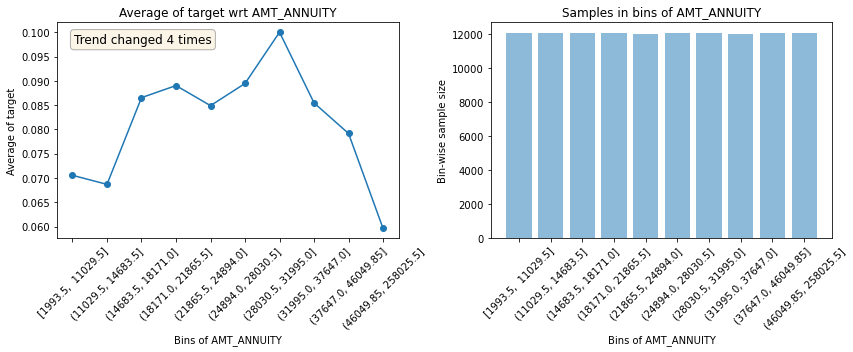

                                           Test data plots                                            


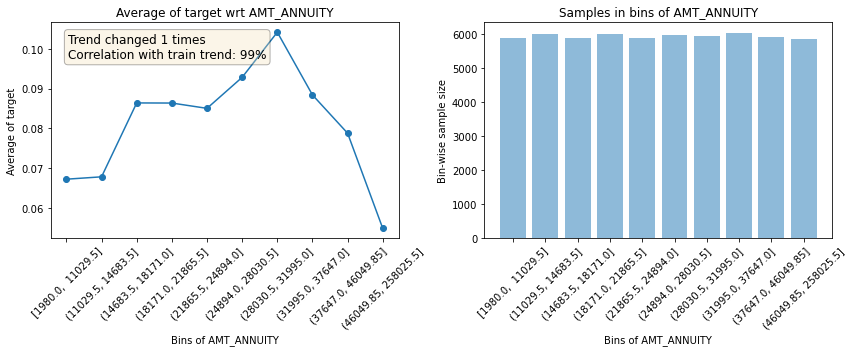

--------------------------------------------------------------------------------------------------------------


                                      Plots for AMT_GOODS_PRICE                                       
                                           Train data plots                                           


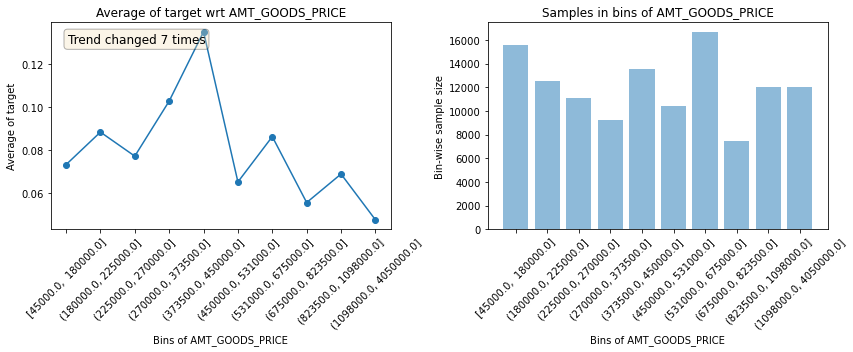

                                           Test data plots                                            


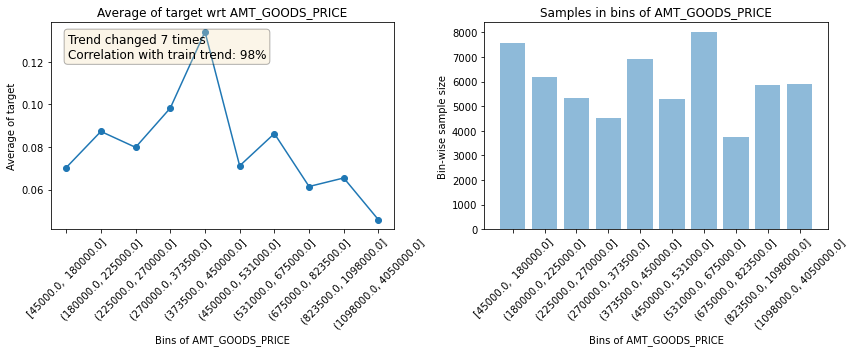

--------------------------------------------------------------------------------------------------------------


                                 Plots for REGION_POPULATION_RELATIVE                                 
                                           Train data plots                                           


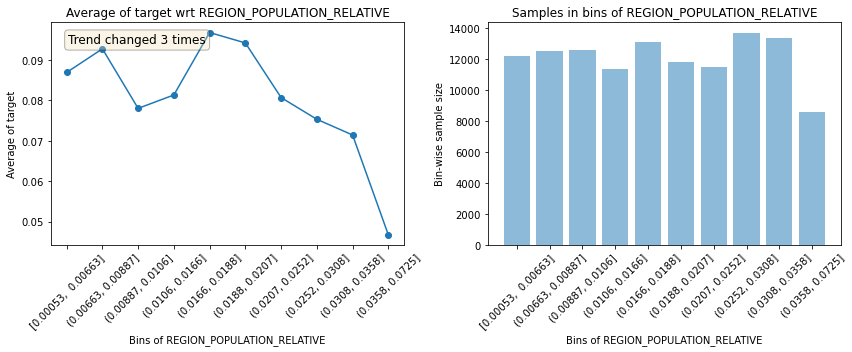

                                           Test data plots                                            


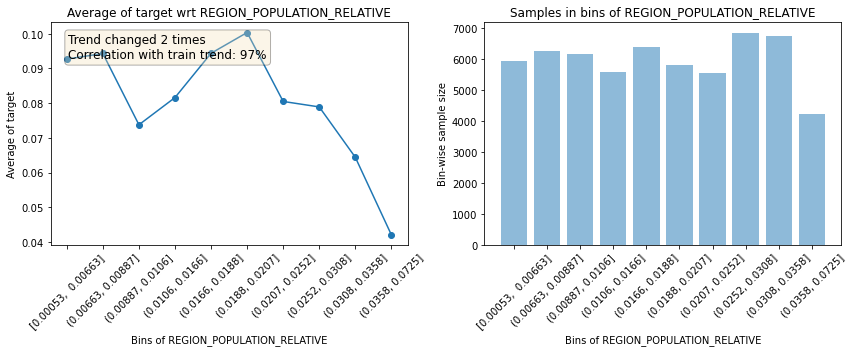

--------------------------------------------------------------------------------------------------------------


                                         Plots for DAYS_BIRTH                                         
                                           Train data plots                                           


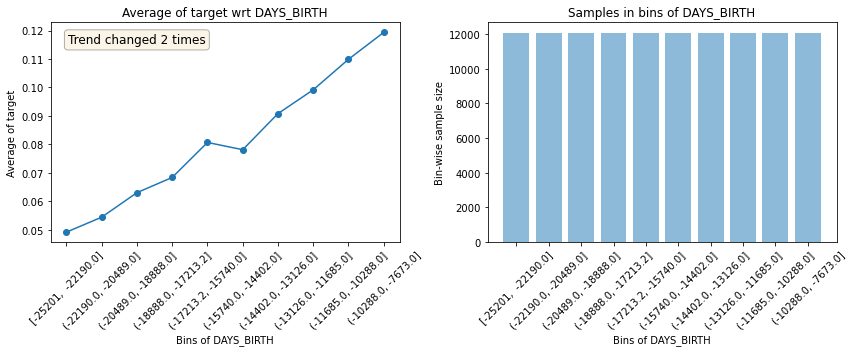

                                           Test data plots                                            


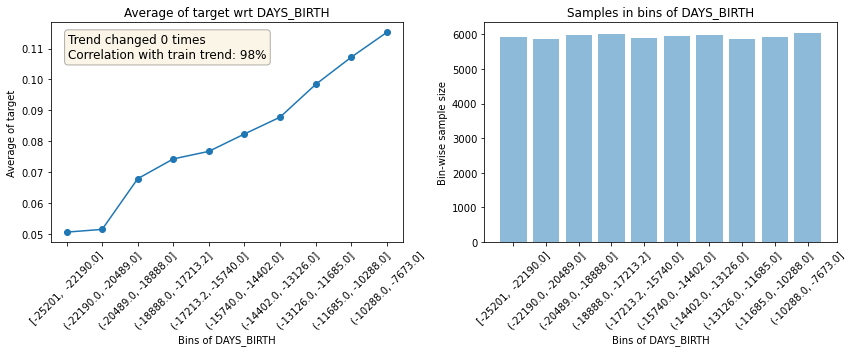

--------------------------------------------------------------------------------------------------------------


                                       Plots for DAYS_EMPLOYED                                        
                                           Train data plots                                           


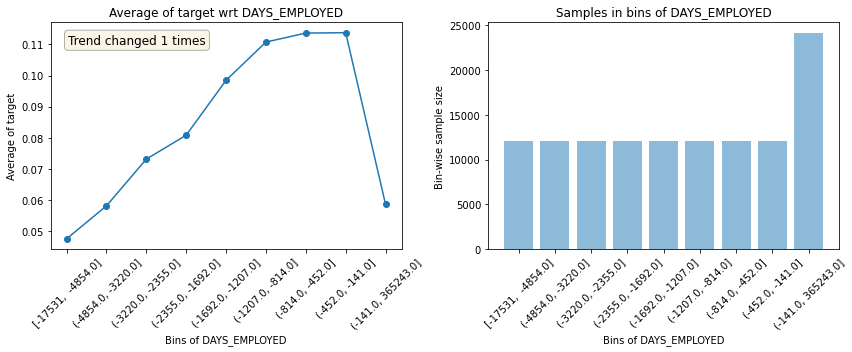

                                           Test data plots                                            


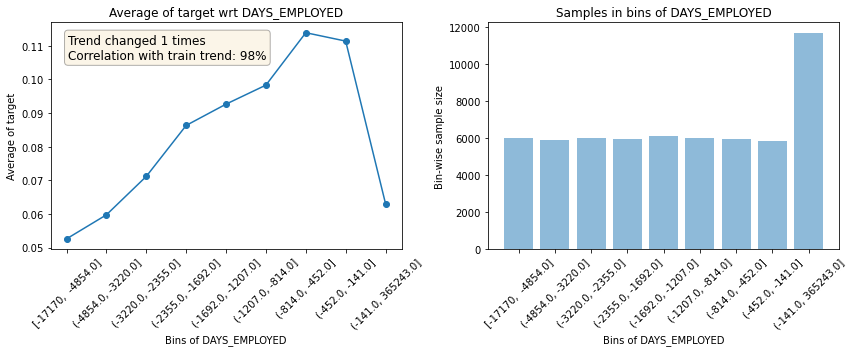

--------------------------------------------------------------------------------------------------------------


                                     Plots for DAYS_REGISTRATION                                      
                                           Train data plots                                           


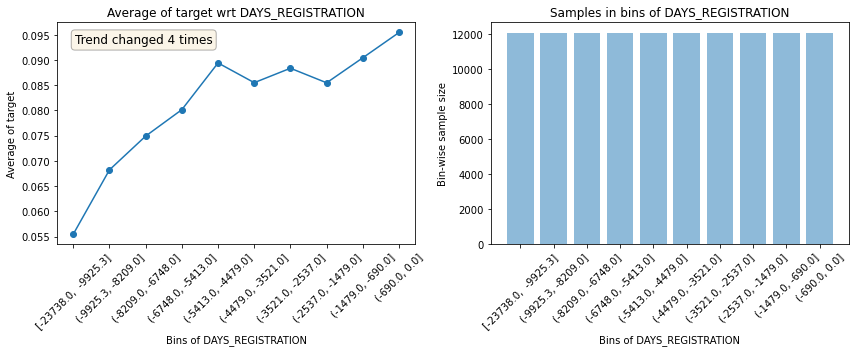

                                           Test data plots                                            


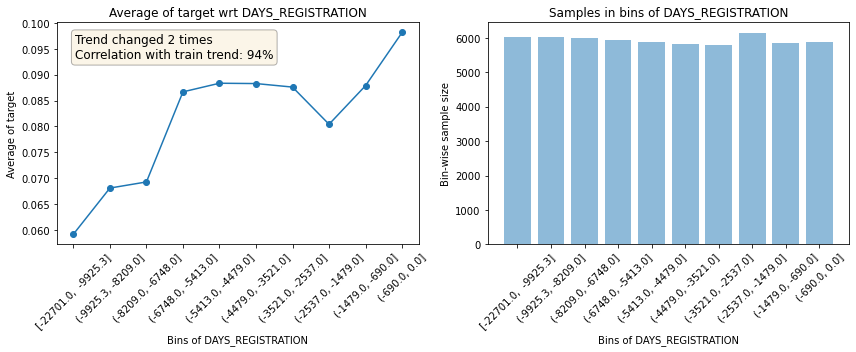

--------------------------------------------------------------------------------------------------------------


                                      Plots for DAYS_ID_PUBLISH                                       
                                           Train data plots                                           


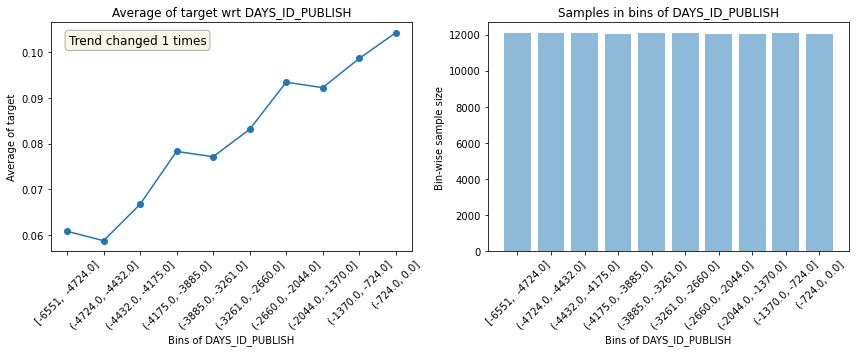

                                           Test data plots                                            


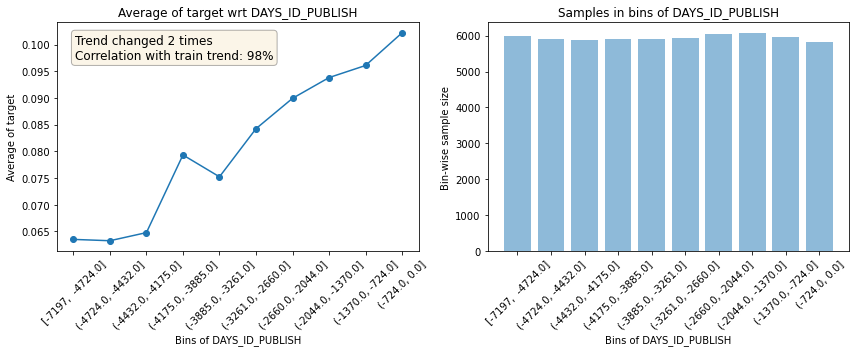

--------------------------------------------------------------------------------------------------------------




In [11]:
get_univariate_plots(data=data_train, target_col='target', features_list=data_train.columns[0:10], data_test=data_test)

                                      Plots for AMT_INCOME_TOTAL                                      
                                           Train data plots                                           


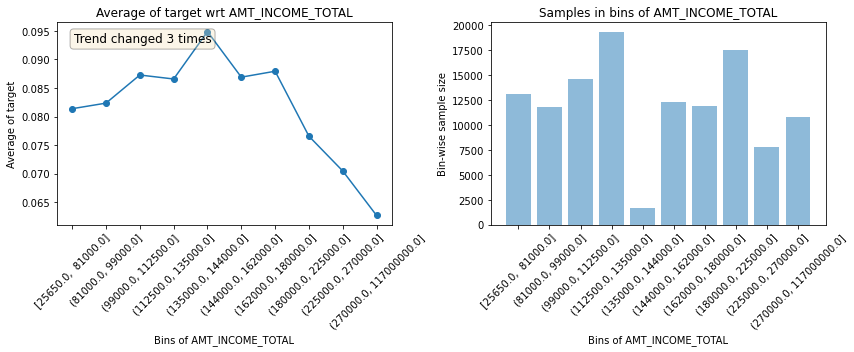

                                           Test data plots                                            


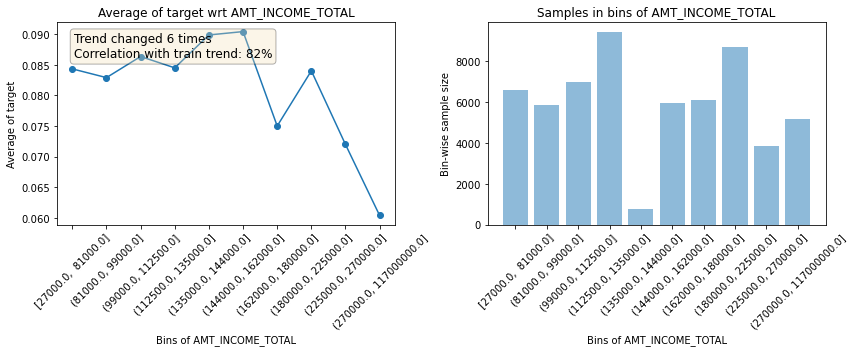

--------------------------------------------------------------------------------------------------------------




In [12]:
grouped_train, grouped_test = univariate_plotter(data=data_train, target_col='target', feature='AMT_INCOME_TOTAL',data_test=data_test)

In [13]:
grouped_train

,AMT_INCOME_TOTAL,Samples_in_bin,target_mean,AMT_INCOME_TOTAL_mean
0,"[25650.0, 81000.0]",13064,0.081369,66240.562007
1,"(81000.0, 99000.0]",11816,0.082346,91074.970062
2,"(99000.0, 112500.0]",14541,0.087270,111314.779967
3,"(112500.0, 135000.0]",19279,0.086571,131826.785705
4,"(135000.0, 144000.0]",1697,0.094873,142976.035474
5,"(144000.0, 162000.0]",12291,0.086893,157118.277269
6,"(162000.0, 180000.0]",11873,0.087931,178050.189758
7,"(180000.0, 225000.0]",17519,0.076545,212644.325529
8,"(225000.0, 270000.0]",7778,0.070455,259424.327025
9,"(270000.0, 117000000.0]",10740,0.062663,402013.113520


                                      Plots for AMT_INCOME_TOTAL                                      


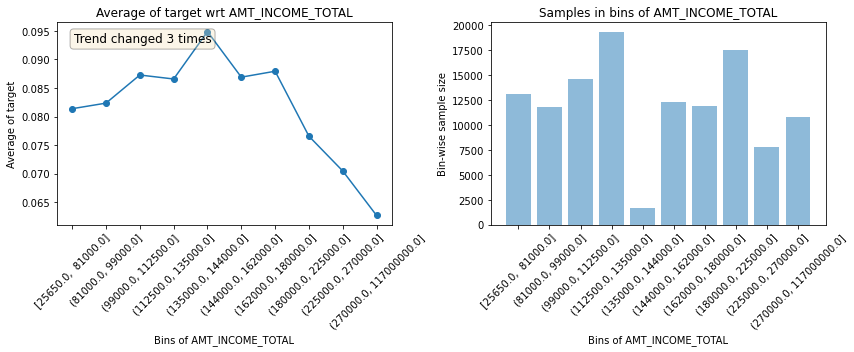

--------------------------------------------------------------------------------------------------------------




In [14]:
grouped_train = univariate_plotter(data=data_train, target_col='target', feature='AMT_INCOME_TOTAL')

In [15]:
grouped_train

,AMT_INCOME_TOTAL,Samples_in_bin,target_mean,AMT_INCOME_TOTAL_mean
0,"[25650.0, 81000.0]",13064,0.081369,66240.562007
1,"(81000.0, 99000.0]",11816,0.082346,91074.970062
2,"(99000.0, 112500.0]",14541,0.087270,111314.779967
3,"(112500.0, 135000.0]",19279,0.086571,131826.785705
4,"(135000.0, 144000.0]",1697,0.094873,142976.035474
5,"(144000.0, 162000.0]",12291,0.086893,157118.277269
6,"(162000.0, 180000.0]",11873,0.087931,178050.189758
7,"(180000.0, 225000.0]",17519,0.076545,212644.325529
8,"(225000.0, 270000.0]",7778,0.070455,259424.327025
9,"(270000.0, 117000000.0]",10740,0.062663,402013.113520


In [17]:
stats = get_trend_stats(data=data_train, target_col='target', data_test=data_test)

Only one bin created for FLAG_MOBIL. Correlation can't be calculated
Only one bin created for FLAG_CONT_MOBILE. Correlation can't be calculated
Only one bin created for FLAG_DOCUMENT_2. Correlation can't be calculated
Only one bin created for FLAG_DOCUMENT_12. Correlation can't be calculated
Only one bin created for NAME_CONTRACT_TYPE_Cash loans. Correlation can't be calculated
Only one bin created for NAME_CONTRACT_TYPE_nan. Correlation can't be calculated
Only one bin created for CODE_GENDER_nan. Correlation can't be calculated
Only one bin created for FLAG_OWN_CAR_nan. Correlation can't be calculated
Only one bin created for FLAG_OWN_REALTY_nan. Correlation can't be calculated
Only one bin created for NAME_INCOME_TYPE_nan. Correlation can't be calculated
Only one bin created for NAME_EDUCATION_TYPE_nan. Correlation can't be calculated
Only one bin created for NAME_FAMILY_STATUS_nan. Correlation can't be calculated
Only one bin created for NAME_HOUSING_TYPE_nan. Correlation can't be 

In [18]:
stats

,Feature,Trend_changes,Trend_changes_test,Trend_correlation
0,CNT_CHILDREN,2,0,0.838285
1,AMT_INCOME_TOTAL,3,6,0.825384
2,AMT_CREDIT,3,3,0.974228
3,AMT_ANNUITY,4,1,0.991590
4,AMT_GOODS_PRICE,7,7,0.989650
...,...,...,...,...
193,WALLSMATERIAL_MODE_Wooden,0,0,1.000000
194,WALLSMATERIAL_MODE_nan,0,0,1.000000
195,EMERGENCYSTATE_MODE_No,0,0,1.000000
196,EMERGENCYSTATE_MODE_Yes,0,0,1.000000


                                         Plots for DAYS_BIRTH                                         


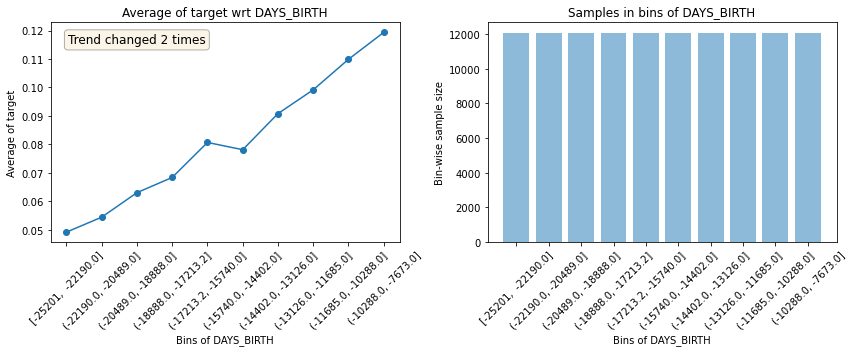

--------------------------------------------------------------------------------------------------------------




In [20]:
get_univariate_plots(data=data_train, target_col='target', features_list=['DAYS_BIRTH'], bins=10)

                                         Plots for AMT_CREDIT                                         


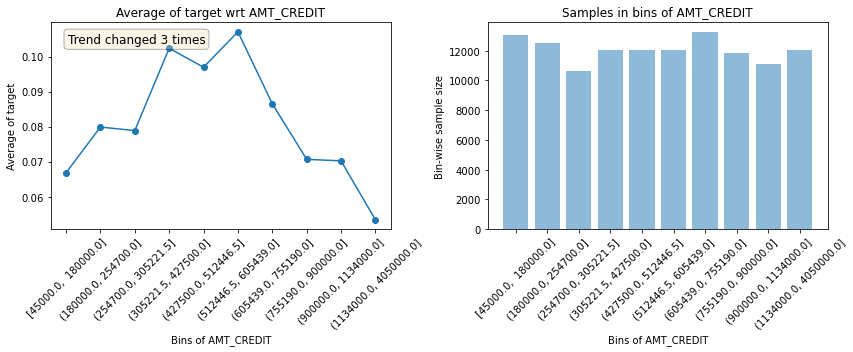

--------------------------------------------------------------------------------------------------------------




In [21]:
get_univariate_plots(data=data_train, target_col='target', features_list=['AMT_CREDIT'], bins=10)